In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt, dates

In [167]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

In [249]:
gmx_arb = pd.read_csv('data/GMX_Arbitrum_Fees_2021-08-31_2022-07-05.csv')
gmx_avax = pd.read_csv('data/GMX_Avax_Fees_2022-01-06_2022-07-05.csv')
gmx_price_raw = pd.read_csv('data/gmx-usd-price.csv')
gmx_arb_staked = pd.read_csv('data/gmx_staked_arbi.csv')
gmx_avax_staked = pd.read_csv('data/gmx_staked_avax.csv')
gmx_arb.head()

,Date,Swap,Margin trading,Mint GLP,Burn GLP,Liquidation,Cumulative
0,2021-08-31,0.399321,0.153256,0.118304,0.206160,0.0,0.877041
1,2021-09-01,866.365339,101.848845,4843.226667,0.033713,0.0,5812.351605
2,2021-09-02,854.002762,741.708859,1610.527787,134.264965,0.0,9152.855978
3,2021-09-03,1388.241363,3127.266851,22.380404,0.000000,0.0,13690.744595
4,2021-09-04,219.024733,768.756821,82.883759,0.000000,0.0,14761.409908


<AxesSubplot:title={'center':'Weekly GMX Revenue Avax'}, xlabel='Week', ylabel='Revenue'>

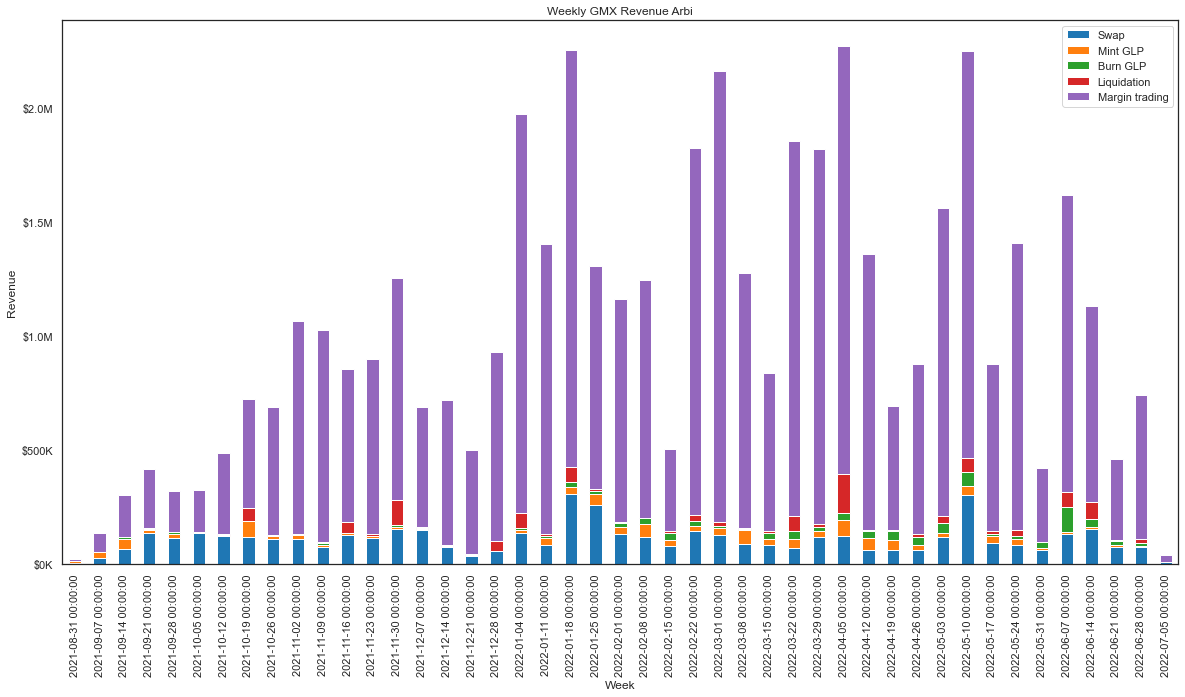

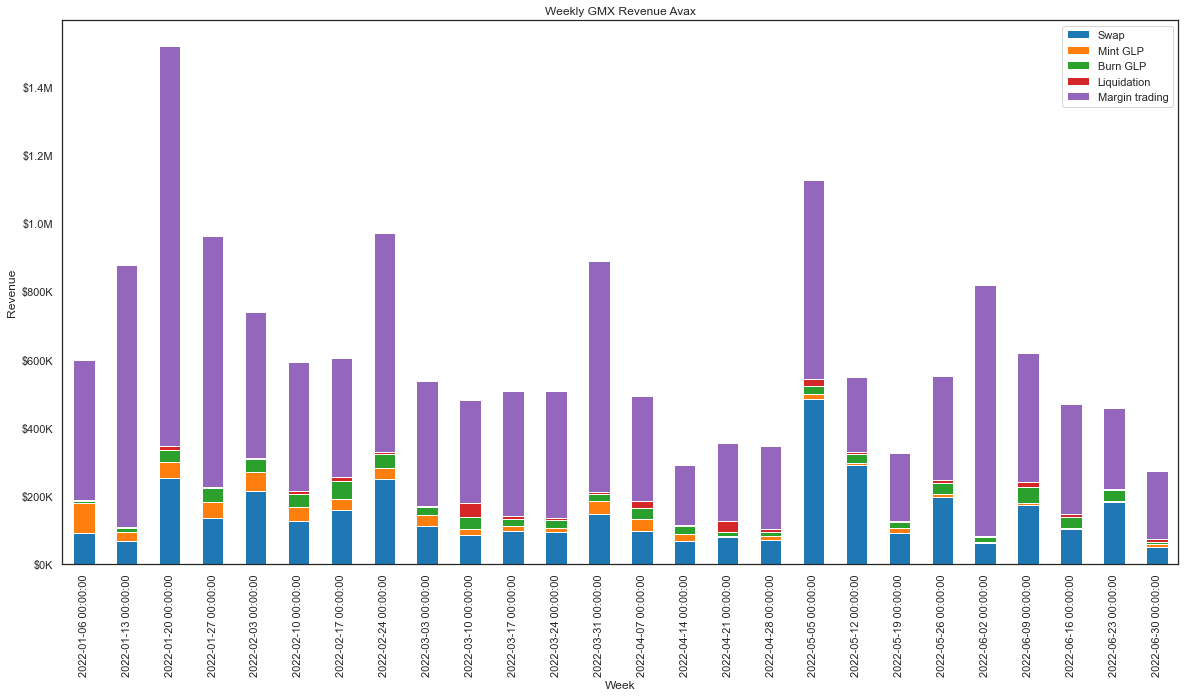

In [169]:
plt.rcParams["figure.figsize"] = [20, 10]
sns.set_theme(style="white", palette=None)

def weekly_chain_rev(chain, gmx_data):
    gmx_data.index = pd.to_datetime(gmx_data['Date'])
    gmx_data_res = gmx_data.resample('7D').sum()

    cum_fee = gmx_data_res[['Swap',  'Mint GLP', 'Burn GLP', 'Liquidation','Margin trading']].plot(kind='bar', stacked=True)
    cum_fee.set( 
           xlabel='Week', 
           ylabel='Revenue',
           title=f'Weekly GMX Revenue {chain}')
    cum_fee.yaxis.set_major_formatter(currency)
    # cum_fee_arb.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
    return cum_fee

weekly_chain_rev('Arbi', gmx_arb)
weekly_chain_rev('Avax', gmx_avax)

In [326]:
gmx_price_raw.index = pd.to_datetime(gmx_price_raw['Date'])
gmx_price_raw.index = gmx_price_raw.index.tz_localize(None)
gmx_price = gmx_price_raw.drop(['Date'], axis=1)

def gmx_yield(gmx_data, chain_staked_table, chain):
    
    gmx_total_fee = pd.DataFrame(gmx_data.set_index('Date').drop(['Cumulative'], axis=1).sum(axis=1)*0.3)
    gmx_total_fee.columns = ['GMX_fee']
    
    chain_staked_table['time'] = pd.to_datetime(chain_staked_table['time'], unit='s')
    chain_staked_table = chain_staked_table.sort_values(by=['time']).set_index('time').resample('1D').mean().dropna()

    master_df = pd.merge(gmx_price, gmx_total_fee, left_index=True, right_index=True)
    master_df = pd.merge(chain_staked_table[['balance']], master_df, left_index=True, right_index=True)
    
    master_df['E_coin_d'] = master_df.GMX_fee / master_df.balance
    master_df['E_coin_ann'] = master_df['E_coin_d']*365
    master_df['P/E'] = master_df.price/master_df.E_coin_ann
    master_df['ARR'] = master_df.E_coin_ann/master_df.price

    if chain == 'avax':
        master_df = master_df[(master_df.index > '2022-02-01')]
    
    return master_df


arbi_data = gmx_yield(gmx_arb, gmx_arb_staked, 'arbi')
avax_data = gmx_yield(gmx_avax, gmx_avax_staked, 'avax')

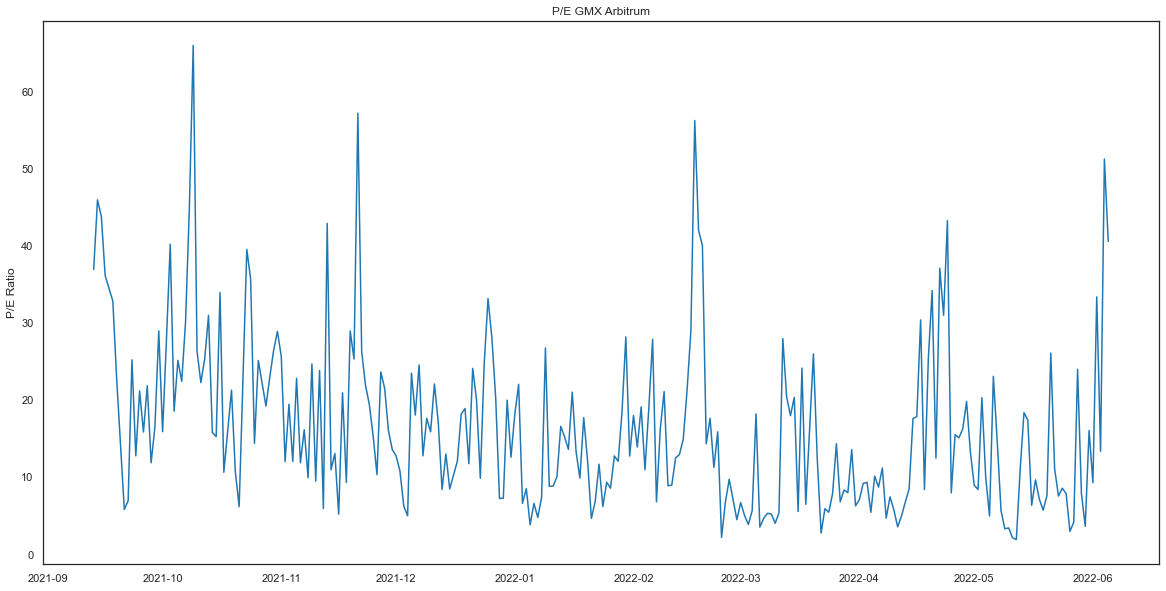

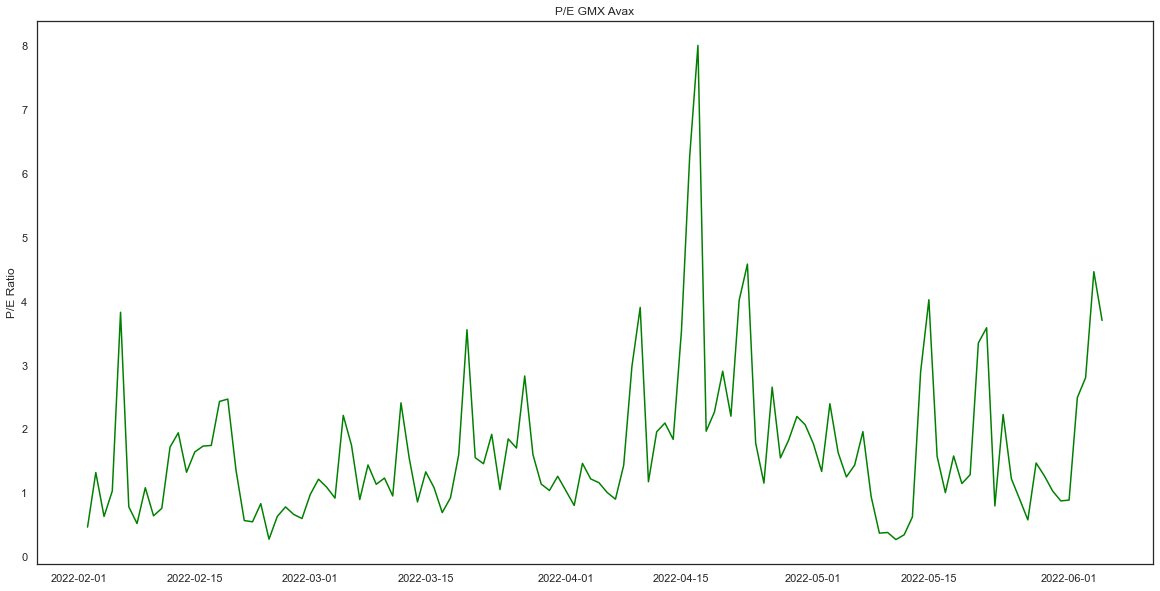

In [314]:
plt.plot(arbi_data.index, arbi_data['P/E'])
plt.title('P/E GMX Arbitrum')
plt.ylabel('P/E Ratio')
plt.show()

plt.plot(avax_data.index, avax_data['P/E'], color='green')
plt.title('P/E GMX Avax')
plt.ylabel('P/E Ratio')
plt.show()

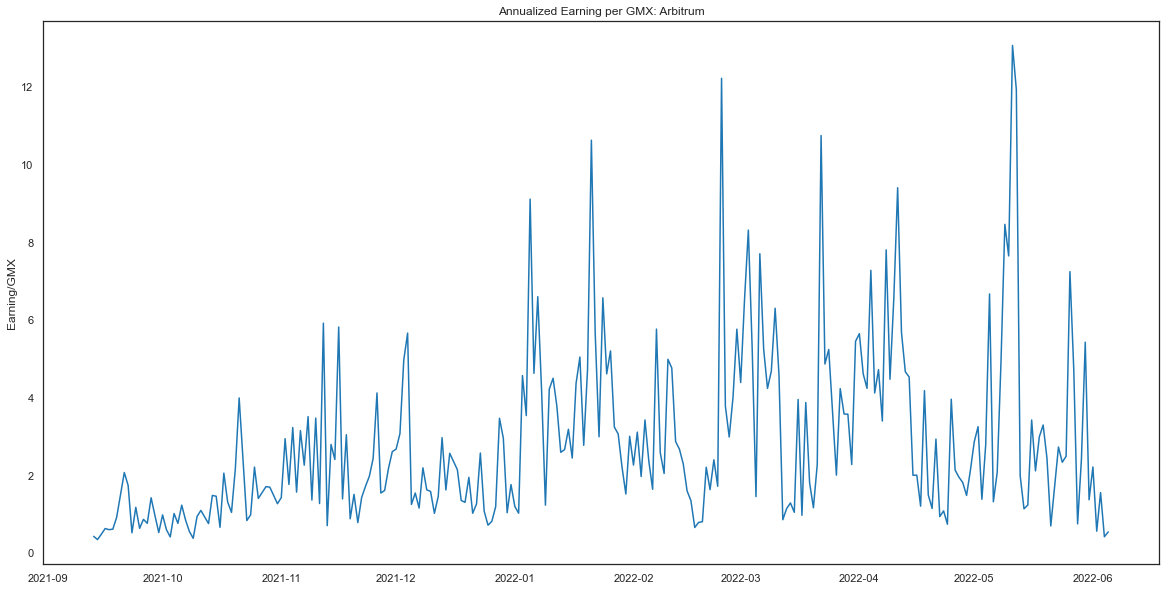

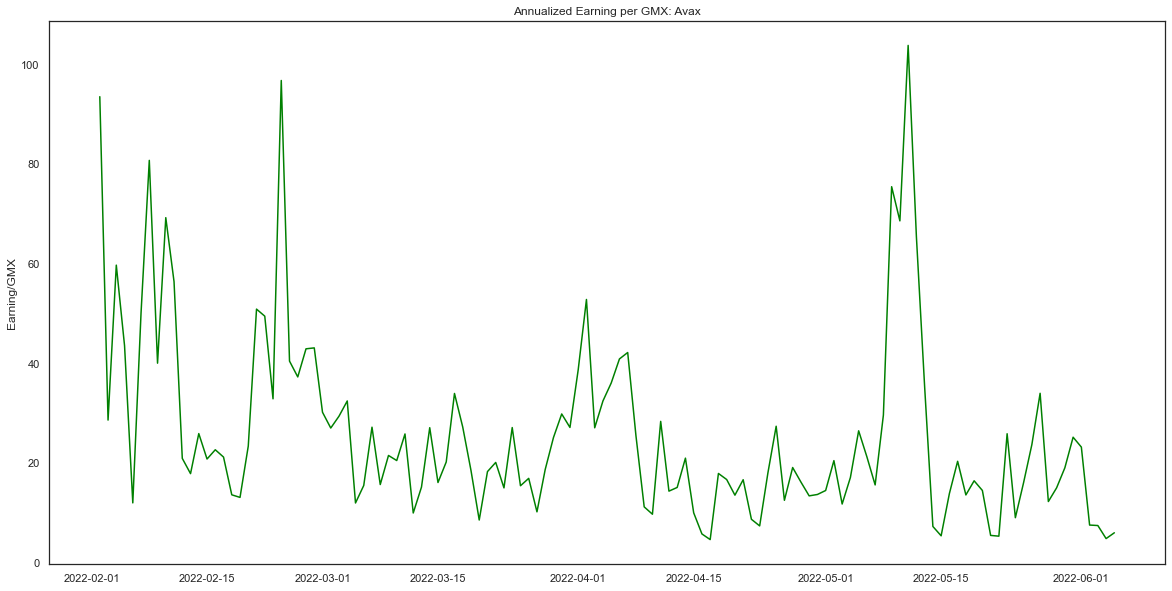

In [315]:
plt.plot(arbi_data.index, arbi_data['E_coin_ann'])
plt.title('Annualized Earning per GMX: Arbitrum')
plt.ylabel('Earning/GMX')
plt.show()

plt.plot(avax_data.index, avax_data['E_coin_ann'], color='green')
plt.title('Annualized Earning per GMX: Avax')
plt.ylabel('Earning/GMX')
plt.show()

In [ ]:
plt.plot(arbi_data.index, arbi_data['E_coin_ann'])
plt.title('Annualized Earning per GMX: Arbitrum')
plt.ylabel('Earning/GMX')
plt.show()

plt.plot(avax_data.index, avax_data['E_coin_ann'], color='green')
plt.title('Annualized Earning per GMX: Avax')
plt.ylabel('Earning/GMX')
plt.show()

In [281]:
### I THINK THIS IS WRONG////

gmx_price_raw.index = pd.to_datetime(gmx_price_raw['Date'])
gmx_price_raw.index = gmx_price_raw.index.tz_localize(None)
gmx_price = gmx_price_raw.drop(['Date'], axis=1)

def gmx_yield(gmx_data, chain_staked_table, chain):
    
    gmx_total_fee = pd.DataFrame(gmx_data.set_index('Date').drop(['Cumulative'], axis=1).sum(axis=1)*0.3)
    gmx_total_fee.columns = ['GMX_fee']
    
    chain_staked_table['time'] = pd.to_datetime(chain_staked_table['time'], unit='s')
    chain_staked_table = chain_staked_table.sort_values(by=['time']).set_index('time').resample('1D').mean().dropna()

    master_df = pd.merge(gmx_price, gmx_total_fee, left_index=True, right_index=True)
    master_df = pd.merge(chain_staked_table[['balance']], master_df, left_index=True, right_index=True)
    
    master_df['usd_balance'] = master_df.balance*master_df.price
    master_df['yield'] = master_df.GMX_fee/master_df.usd_balance
    master_df['ARR'] = (((1 + master_df['yield'])**365)-1)
    master_df['P/E'] = master_df.price/(master_df.price*master_df.ARR)

    if chain == 'avax':

        master_df = master_df[(master_df.index > '2022-02-01')]
    
    pe_table_week = master_df[['P/E']]
    yield_table_week = master_df[['ARR']]
    

    return pe_table_week, yield_table_week, master_df


# gmx_yield(gmx_arb, gmx_arb_staked)[1]
gmx_yield(gmx_avax, gmx_avax_staked, 'avax')[2]

Index(['block', 'balance'], dtype='object')
c


,balance,price,GMX_fee,usd_balance,yield,ARR,P/E
2022-02-02,294141.192546,43.181060,75326.930779,1.270133e+07,0.005931,7.656303,0.130611
2022-02-03,292701.255355,37.585107,22898.322588,1.100121e+07,0.002081,1.136000,0.880282
2022-02-04,300458.874346,37.494671,49109.723951,1.126561e+07,0.004359,3.892348,0.256914
2022-02-05,302483.812940,44.704511,36041.832893,1.352239e+07,0.002665,1.642054,0.608993
2022-02-06,298253.897150,45.656521,9752.063033,1.361724e+07,0.000716,0.298622,3.348720
...,...,...,...,...,...,...,...
2022-06-01,400561.180274,20.484129,25391.213348,8.205147e+06,0.003095,2.088747,0.478756
2022-06-02,403353.939635,18.639521,8270.704000,7.518324e+06,0.001100,0.493774,2.025217
2022-06-03,406522.956523,20.701032,8230.132178,8.415445e+06,0.000978,0.428733,2.332454
2022-06-04,405623.213557,21.281999,5301.273228,8.632473e+06,0.000614,0.251172,3.981335
